In [1]:
import pandas as pd

In [2]:
df_lacentrale = pd.read_csv('lacentrale2.csv')

In [3]:
from bs4 import BeautifulSoup

In [13]:
df = df_lacentrale[['date', 'fuel', 'critair']]

In [42]:
from sklearn.ensemble import RandomForestClassifier

In [43]:
from sklearn.metrics import r2_score, mean_squared_error, classification_report

In [8]:
from sklearn.model_selection import train_test_split

In [10]:
from sklearn.preprocessing import LabelEncoder

In [14]:
df['fuel'] = LabelEncoder().fit_transform(df['fuel'])

C:\Users\Enzo\AppData\Local\Temp\ipykernel_11932\4130058334.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['fuel'] = LabelEncoder().fit_transform(df['fuel'])


In [22]:
df = df.dropna()

In [40]:
X_train, X_test, y_train, y_test = train_test_split(df[['date', 'fuel']], df['critair'])

In [44]:
rg = RandomForestClassifier().fit(X_train, y_train)

In [46]:
print(classification_report(rg.predict(X_test), y_test))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        41
         1.0       0.97      1.00      0.99       739
         2.0       1.00      0.96      0.98       467
         3.0       0.83      1.00      0.91         5
         4.0       1.00      1.00      1.00         1
        12.0       0.00      0.00      0.00         0
        22.0       0.00      0.00      0.00         0

    accuracy                           0.98      1253
   macro avg       0.69      0.71      0.70      1253
weighted avg       0.98      0.98      0.98      1253



C:\Users\Enzo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Enzo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Enzo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [38]:
import seaborn as sns

C:\Users\Enzo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='critair'>

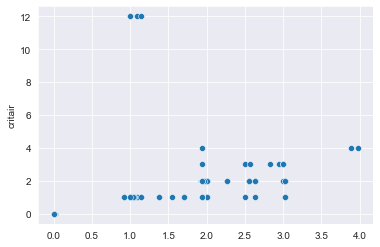

In [39]:
sns.scatterplot(rg.predict(X_test), y_test)